In [1]:
from nltk import tokenize
import re

import matplotlib.pyplot as plt
import seaborn as sns
import string
from spacy import displacy
import spacy
from IPython import display
import numpy as np
from jupyterthemes import jtplot

from itertools import tee

jtplot.style(theme='solarizedl')

In [2]:
def print_tags(tokens, attribute, palette='Set2', with_tags=True):
    
    filter_out = ['PUNCT', "", " ", None]
    style = """background: {}; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;"""
    tag_style = """font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; 
                    text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem;"""
    bare_style = """line-height: 2.5; direction: ltr;"""
    if not attribute.endswith('_'):
        attribute+='_'
        #color:{pal[n]}; 
        
    attribs = np.unique([getattr(t, attribute) for t in tokens])
    pal = sns.palettes.color_palette(palette, n_colors=len(attribs)).as_hex()
    
    stng = f'<p style="{bare_style}">'
    for i, token in enumerate(tokens):
        if (str(token) not in string.punctuation) or (i==0):
            stng = stng+ " "
        color = pal[np.where(attribs==getattr(token, attribute))[0][0]]
        
        if with_tags and getattr(token, attribute) not in filter_out:
            stng = stng + f'<text style="{style.format(color)}">'
            stng = stng + f'{token.text} <text style="{tag_style}">{getattr(token, attribute)}' +'</text></text>'
        elif getattr(token, attribute) in filter_out:
            stng = stng + f'<text style="{bare_style}">{token} </text>'
        else:
            stng = stng + f'<text style="{style.format(color)}">{token} </text>'
    if not with_tags:
        
        stng +=f'</p><p style="{bare_style}">LEGEND:</p><p style="{bare_style}">'
        for i, p in enumerate(attribs):
            if p not in filter_out:
                stng = stng + f'<text style="{style.format(pal[i])}">{spacy.explain(p)}: <text style="{tag_style}">{p} </text></text>'
    stng += '</p>'
    return display.HTML(stng)

def window(iterable, size):
    iters = tee(iterable, size)
    for i in range(1, size):
        for each in iters[i:]:
            next(each, None)
    return zip(*iters)

# Natural Language Processing -- Part 1

## NLP

Natural Language Processing (NLP) is the field concerned with computational techniques that allow computers to deal with human language. 

Linguistics provides a theoretical and historical basis for NLP, but NLP also falls within the realms of computer science and artificial intelligence.

Besides text mining, NLP also covers text generation, chat bots, sentiment analysis, speech recognition, digital voice assistants like Siri and more. 

### This part will cover the basis of text analysis
<li>   <b>Regular Expression:</b> RegEx</li>
<li>   <b>Tokenization:</b> Determining word units</li>
<li>   <b>Lemmatization and Stemming:</b> Returning the base of a word
<li>   <b>Part-of-speech tagging:</b> Determining grammatical function of a word</li>
<li>   <b>Named entity recognition:</b> Recognizing real-world things (people, places)</li>
<li>   <b>N-grams:</b> Grouping words that belong together</li>
<li>   <b>Parsing:</b> Syntatic structure of a sentence </li>

# Regular expression: RegEx

Regular expression is a very common and wide-used technique for text mining. Using a special syntax to create patterns you can grab certain character groups from text.

RegEx works best for words with distinct patterns such as phone numbers, email addresses or to remove unwanted characters.

``` python
>>> import re

>>> re.match("cat", "The cat knocked the glass of the table.")
>>> "cat"

>>> re.findall(r'\d+', "We have 3 cats and 2 dogs.")
>>> ['3', '2']
```

<img src='https://miro.medium.com/max/1244/1*-0KNCt7wBY1T6lt3mCkCuQ.png'>
In addition:

``` python
.      Any character except newline
*      Match 0 or more
+      Match 1 or more
{n}    Match exactly n
{n,}   Match at least n
{n, m} Match between n and m
```

Other cheetsheets:
https://cheatography.com/mutanclan/cheat-sheets/python-regular-expression-regex/

In [3]:
# Other useful expressions:
# r'(?:...)' <- a non matching group
#(?=...) Positive lookbehind
my_string = "foo bar bar baz"

print("All bar:", re.findall(r'bar', my_string))
print("Only after foo:", re.findall(r'(?:foo\s)(bar)', my_string))


All bar: ['bar', 'bar']
Only after foo: ['bar']


In [4]:
re.match    # Try to apply the pattern at 
            # the start of the string
re.search   # Scan through string 
            # looking for a match to the pattern
re.findall  # Find all matches in a string
re.finditer # Return an iterator over 
            # all non-overlapping matches

<function re.finditer(pattern, string, flags=0)>

More complicated regeular expression can become quite long:
``` python
"^([a-zA-Z0-9_\-\.]+)@([a-zA-Z0-9_\-\.]+)\.([a-zA-Z]{2,5})$"
```

In [5]:
my_string = "My email address is groothuis.susanne@kpmg.nl"
pattern = "([a-zA-Z0-9_\-\.]+)@([a-zA-Z0-9_\-\.]+)\.([a-zA-Z]{2,5})"
re.search(pattern, my_string)

<re.Match object; span=(20, 45), match='groothuis.susanne@kpmg.nl'>

In [6]:
# You can also use regular expression to split texts:
my_string = """A regular expression (shortened as regex or regexp also referred to as rational expression) is a sequence of characters that define a search pattern. Usually such patterns are used by string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation. It is a technique developed in theoretical computer science and formal language theory.

The concept arose in the 1950s when the American mathematician Stephen Cole Kleene formalized the description of a regular language. The concept came into common use with Unix text-processing utilities. Different syntaxes for writing regular expressions have existed since the 1980s, one being the POSIX standard and another, widely used, being the Perl syntax.

Regular expressions are used in search engines, search and replace dialogs of word processors and text editors, in text processing utilities such as sed and AWK and in lexical analysis. Many programming languages provide regex capabilities either built-in or via libraries."""

In [7]:
re.split('\.\s',my_string)

['A regular expression (shortened as regex or regexp also referred to as rational expression) is a sequence of characters that define a search pattern',
 'Usually such patterns are used by string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation',
 'It is a technique developed in theoretical computer science and formal language theory',
 '\nThe concept arose in the 1950s when the American mathematician Stephen Cole Kleene formalized the description of a regular language',
 'The concept came into common use with Unix text-processing utilities',
 'Different syntaxes for writing regular expressions have existed since the 1980s, one being the POSIX standard and another, widely used, being the Perl syntax',
 '\nRegular expressions are used in search engines, search and replace dialogs of word processors and text editors, in text processing utilities such as sed and AWK and in lexical analysis',
 'Many programming languages provide regex cap

# Tokenization

Tokenization is, generally, an early step in the NLP process, a step which splits longer strings of text into smaller pieces, or tokens. Larger chunks of text can be tokenized into sentences (“sentence tokens”), sentences can be tokenized into words (“word tokens”), etc.

In [8]:
sentence = "We've tokenized this sentence into words."
sentence.split(' ')

["We've", 'tokenized', 'this', 'sentence', 'into', 'words.']

#### There are tokenizers that split up sentences based on punctuation

In [9]:
tok = tokenize.PunktSentenceTokenizer()
tokens = tok.tokenize(my_string)
print(f"There are {len(tokens)} sentences.")
tokens

There are 8 sentences.


['A regular expression (shortened as regex or regexp also referred to as rational expression) is a sequence of characters that define a search pattern.',
 'Usually such patterns are used by string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation.',
 'It is a technique developed in theoretical computer science and formal language theory.',
 'The concept arose in the 1950s when the American mathematician Stephen Cole Kleene formalized the description of a regular language.',
 'The concept came into common use with Unix text-processing utilities.',
 'Different syntaxes for writing regular expressions have existed since the 1980s, one being the POSIX standard and another, widely used, being the Perl syntax.',
 'Regular expressions are used in search engines, search and replace dialogs of word processors and text editors, in text processing utilities such as sed and AWK and in lexical analysis.',
 'Many programming languages provide regex 

#### Other split all words and punctuations as seperate tokens

In [10]:
tok = tokenize.NLTKWordTokenizer()
tokens = tok.tokenize(my_string)
print(f"There are {len(tokens)} tokens")
tokens

There are 166 tokens


['A',
 'regular',
 'expression',
 '(',
 'shortened',
 'as',
 'regex',
 'or',
 'regexp',
 'also',
 'referred',
 'to',
 'as',
 'rational',
 'expression',
 ')',
 'is',
 'a',
 'sequence',
 'of',
 'characters',
 'that',
 'define',
 'a',
 'search',
 'pattern.',
 'Usually',
 'such',
 'patterns',
 'are',
 'used',
 'by',
 'string-searching',
 'algorithms',
 'for',
 '``',
 'find',
 "''",
 'or',
 '``',
 'find',
 'and',
 'replace',
 "''",
 'operations',
 'on',
 'strings',
 ',',
 'or',
 'for',
 'input',
 'validation.',
 'It',
 'is',
 'a',
 'technique',
 'developed',
 'in',
 'theoretical',
 'computer',
 'science',
 'and',
 'formal',
 'language',
 'theory.',
 'The',
 'concept',
 'arose',
 'in',
 'the',
 '1950s',
 'when',
 'the',
 'American',
 'mathematician',
 'Stephen',
 'Cole',
 'Kleene',
 'formalized',
 'the',
 'description',
 'of',
 'a',
 'regular',
 'language.',
 'The',
 'concept',
 'came',
 'into',
 'common',
 'use',
 'with',
 'Unix',
 'text-processing',
 'utilities.',
 'Different',
 'syntaxes'

#### Or you can define your own tokenizer using regular expression
This tokenizer only keeps tokens that match to the regular expression. As you can see the numbers and special characters are no longer in the list of tokens.

In [11]:
pattern = '\w+'
tok = tokenize.RegexpTokenizer(pattern)
tokens = tok.tokenize(my_string)
print(f"There are {len(tokens)} tokens")
tokens

There are 156 tokens


['A',
 'regular',
 'expression',
 'shortened',
 'as',
 'regex',
 'or',
 'regexp',
 'also',
 'referred',
 'to',
 'as',
 'rational',
 'expression',
 'is',
 'a',
 'sequence',
 'of',
 'characters',
 'that',
 'define',
 'a',
 'search',
 'pattern',
 'Usually',
 'such',
 'patterns',
 'are',
 'used',
 'by',
 'string',
 'searching',
 'algorithms',
 'for',
 'find',
 'or',
 'find',
 'and',
 'replace',
 'operations',
 'on',
 'strings',
 'or',
 'for',
 'input',
 'validation',
 'It',
 'is',
 'a',
 'technique',
 'developed',
 'in',
 'theoretical',
 'computer',
 'science',
 'and',
 'formal',
 'language',
 'theory',
 'The',
 'concept',
 'arose',
 'in',
 'the',
 '1950s',
 'when',
 'the',
 'American',
 'mathematician',
 'Stephen',
 'Cole',
 'Kleene',
 'formalized',
 'the',
 'description',
 'of',
 'a',
 'regular',
 'language',
 'The',
 'concept',
 'came',
 'into',
 'common',
 'use',
 'with',
 'Unix',
 'text',
 'processing',
 'utilities',
 'Different',
 'syntaxes',
 'for',
 'writing',
 'regular',
 'express

#### Other popular packages such as spacy use tokenizers in it's backend

In [12]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(my_string)
tokens = [tok for tok in doc]
print(f"There are {len(tokens)} tokens")
tokens

There are 181 tokens


[A,
 regular,
 expression,
 (,
 shortened,
 as,
 regex,
 or,
 regexp,
 also,
 referred,
 to,
 as,
 rational,
 expression,
 ),
 is,
 a,
 sequence,
 of,
 characters,
 that,
 define,
 a,
 search,
 pattern,
 .,
 Usually,
 such,
 patterns,
 are,
 used,
 by,
 string,
 -,
 searching,
 algorithms,
 for,
 ",
 find,
 ",
 or,
 ",
 find,
 and,
 replace,
 ",
 operations,
 on,
 strings,
 ,,
 or,
 for,
 input,
 validation,
 .,
 It,
 is,
 a,
 technique,
 developed,
 in,
 theoretical,
 computer,
 science,
 and,
 formal,
 language,
 theory,
 .,
 
 ,
 The,
 concept,
 arose,
 in,
 the,
 1950s,
 when,
 the,
 American,
 mathematician,
 Stephen,
 Cole,
 Kleene,
 formalized,
 the,
 description,
 of,
 a,
 regular,
 language,
 .,
 The,
 concept,
 came,
 into,
 common,
 use,
 with,
 Unix,
 text,
 -,
 processing,
 utilities,
 .,
 Different,
 syntaxes,
 for,
 writing,
 regular,
 expressions,
 have,
 existed,
 since,
 the,
 1980s,
 ,,
 one,
 being,
 the,
 POSIX,
 standard,
 and,
 another,
 ,,
 widely,
 used,
 ,,
 b

# Stemming and Lemmatization

Stemming and Lemmatization are two forms of reducing words to a basic form that captures the family of that word.

Stemming usually cuts off a word to a base:
> **Words** and **wording** become **word**

> **Democracies** become **Democraci**

Lemmatization tries to return the token to the base of the word:
> **Democracies** becomes **Democracy**

Withing both lemmatization and stemming are different algoritms that can be applied, and obviously they also vary for different languages.

The most common stemming algorithms can be found in NLTK, which are the PorterStemmer and the Snowball Stemmer.

Neither application is necessarily the best, they both have different advantages and disadvantages. You need to make a decision on which one to use depending on the application you have in mind.

Let's see an example of the differences between lemmatization and stemming, by comparing the lemmatizer of spacy and the SnowballStemmer from NLTK.

In [13]:
from nltk.stem import SnowballStemmer
import pandas as pd
stemmer = SnowballStemmer('english')
out =[]

sentence = 'Interesting sentences contain various variations wording words of interest'
doc2 = nlp(sentence)
for token in doc2:
    out.append({'token': token.text, 'lemma': token.lemma_, 'stem':stemmer.stem(token.text)})
    
pd.DataFrame.from_dict(out)

,token,lemma,stem
0,Interesting,interesting,interest
1,sentences,sentence,sentenc
2,contain,contain,contain
3,various,various,various
4,variations,variation,variat
5,wording,wording,word
6,words,word,word
7,of,of,of
8,interest,interest,interest


# Part of speech tagging

In part of speech tagging we assing each token it's grammatical purpose in the sentence. This means we tag verbs as verbs, and nouns as nouns.



<AxesSubplot:>

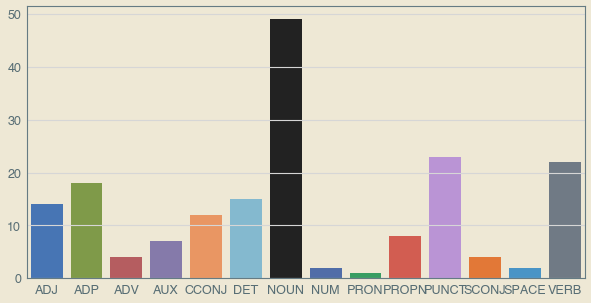

In [29]:
pos_tags, counts = np.unique([t.pos_ for t in tokens], return_counts=True)
plt.figure(figsize=(10,5))
sns.barplot(x=pos_tags, y=counts)

In [15]:
print_tags(tokens, 'pos', 'Set2', with_tags=False)

In [16]:
for tag in pos_tags:
    print(tag, ':', spacy.explain(tag))

ADJ : adjective
ADP : adposition
ADV : adverb
AUX : auxiliary
CCONJ : coordinating conjunction
DET : determiner
NOUN : noun
NUM : numeral
PRON : pronoun
PROPN : proper noun
PUNCT : punctuation
SCONJ : subordinating conjunction
SPACE : space
VERB : verb


<a href=https://universaldependencies.org/u/pos/all.html style="color:gray;">universaldependencies.org</a>

In [17]:
new_sentence = "We can investigate the relationship between words using POS."
doc = nlp(new_sentence)
displacy.render(doc, style='dep')

In [18]:
dep_tags = np.unique([t.dep_ for t in doc])
for tag in dep_tags:
    print(tag, ':', spacy.explain(tag))

ROOT : None
acl : clausal modifier of noun (adjectival clause)
aux : auxiliary
det : determiner
dobj : direct object
nsubj : nominal subject
pobj : object of preposition
prep : prepositional modifier
punct : punctuation


In [19]:
print_tags(doc, 'dep')

# Named entity Recognition

Named entity regognition (or NER) is all about identifying words that relate to real-life things such as people, places, organisations etc.

In [20]:
txt = """Ginsburg was born and grew up in Brooklyn, New York. 
Her older sister died when she was a baby, and her mother died shortly before Ginsburg 
graduated from high school. She earned her bachelor's degree at Cornell University 
and married Martin D. Ginsburg, becoming a mother before starting law school at Harvard, 
where she was one of the few women in her class. Ginsburg transferred to Columbia Law School,
where she graduated joint first in her class. After law school, Ginsburg entered academia. 
She was a professor at Rutgers Law School and Columbia Law School, teaching civil 
procedure as one of the few women in her field."""

doc = nlp(txt)
displacy.render(doc, style='ent')

In [21]:
for ent in np.unique([t.ent_type_ for t in doc]):
    print(ent,':', spacy.explain(ent))

 : None
CARDINAL : Numerals that do not fall under another type
GPE : Countries, cities, states
ORDINAL : "first", "second", etc.
ORG : Companies, agencies, institutions, etc.
PERSON : People, including fictional


In [22]:
txt = """After the extermination of the Luan clan by Duke Ding's great-grandfather Duke Ping, 
the state of Jin had been dominated by the six powerful clans – Fan, Han, Zhao, Wei, Zhonghang, and Zhi. 
In 497 BC a dispute broke out between Zhao Yang (趙鞅), the leader 
of the Zhao clan, and the Fan and Zhonghang clans."""

doc = nlp(txt)
displacy.render(doc, style='ent')

In [23]:
txt = """Giethoorn used to be a pedestrian precinct, but nowadays exceptions are made. 
It became locally famous, especially after 1958, when the Dutch film maker Bert Haanstra 
made his famous comedy Fanfare there. In the old part of the village, there were no roads 
(though a cycling path was eventually added), and all transport was done by water 
over one of the many canals. The lakes in Giethoorn were formed by peat unearthing.

Giethoorn was a separate municipality until 1973, when it became part of 
Brederwiede, which lost its municipality status in 2001 to merge with Steenwijk.
"""

doc = nlp(txt)
displacy.render(doc, style='ent')

In [24]:
# nlp = spacy.load('nl_core_news_md')
import nl_core_news_md
nlp = nl_core_news_md.load()

In [25]:
txt = """Giethoorn (Stellingwerfs: Gietern) is een waterstreekdorp in de kop van Overijssel, in de gemeente Steenwijkerland in de Nederlandse provincie Overijssel en ligt tussen 
Steenwijk en Meppel.

Bert Haanstra nam in Giethoorn in 1958 zijn speelfilmdebuut Fanfare op, een film over twee rivaliserende fanfares in het fictieve dorpje Lagerwiede. Na het verschijnen van de film Fanfare nam het toerisme sterk toe. """

doc = nlp(txt)
displacy.render(doc, style='ent')

# N-Grams
If you payed attention you noticed I skipped over n-grams. 
N-grams, however, are simply words grouped together. You can do this arbitrarily, and make of every possible combination of consecutive words an n-gram:

In [26]:
for n in window([t.text for t in doc][:10], 2):
    print(n)

('Giethoorn', '(')
('(', 'Stellingwerfs')
('Stellingwerfs', ':')
(':', 'Gietern')
('Gietern', ')')
(')', 'is')
('is', 'een')
('een', 'waterstreekdorp')
('waterstreekdorp', 'in')


You usually want to do something smarter, and group them based on what makes sense, or has semantic meaning.
An example of this is already the NER we did above.

We can display the results from spacy in two different ways, and see that spacy already does some 'Chucking' (as it's called) to create semantic meaningful n-grams:

### With n-grams

### No n-grams

In [27]:
displacy.render(doc, 'ent')

In [28]:
print_tags(doc, 'ent_type')

# Exercise time

Go to datacamp.com and practice with regex and NER